[source](https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3)

In [1]:
import numpy as np

np.random.seed(0)

X = [[1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        # the dimension is inverted so that we don't have to transponse during forward propagation
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


In [2]:
layer1 = Layer_Dense(4,5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
# print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


#### Activation functions

In [4]:
import numpy as np

np.random.seed(0)

X = [[1.0, 2.0, 3.0, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = []

#relu
# for i in inputs:
#     if i > 0:
#         output.append(i)
#     elif i <= 0:
#         output.append(0)

for i in inputs:
    output.append(max(0,i))
      
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


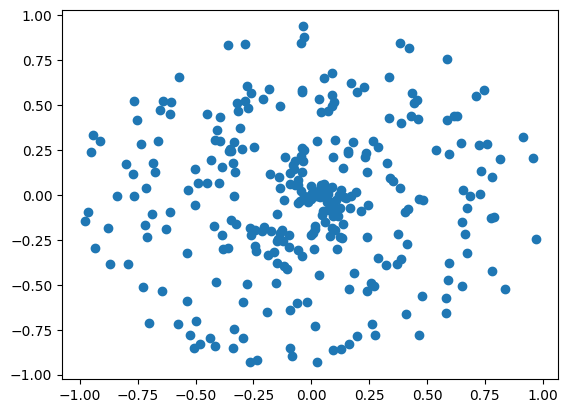

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# https://cs231n.github.io/neural-networks-case-study/
def create_data(points, classes):
    '''
    generates a spiral dataset
    original function is from the link above
    '''
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype = 'uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y



# print("here")
X, y = create_data(100, 3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

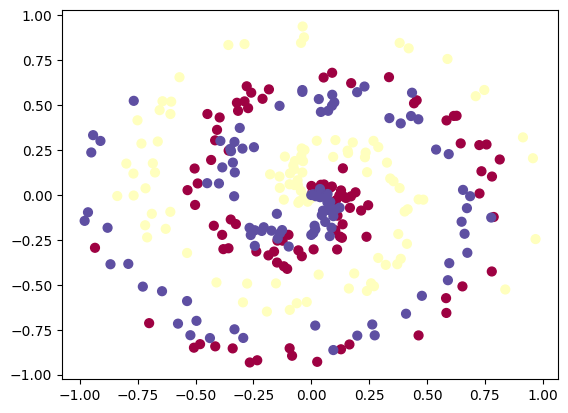

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [25]:
import numpy as np

np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype = 'uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        # the dimension is inverted so that we don't have to transponse during forward propagation
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
#relu object
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [26]:
X, y = create_data(100,3)

layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()
layer1.forward(X)

# print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)
# if most of the outputs are 0 and the network is dying, we can always change the bias to be not zero

# layer2 = Layer_Dense(5,2)
# activation2 = Activation_ReLU()
# layer2.forward(activation1.output)
# activation2.forward(layer2.output)
# print(activation2.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-04
  4.56845892e-05]
 [0.00000000e+00 5.93467943e-05 0.00000000e+00 2.03573189e-04
  6.10024276e-04]
 ...
 [1.13291515e-01 0.00000000e+00 0.00000000e+00 8.11079627e-02
  0.00000000e+00]
 [1.34588354e-01 0.00000000e+00 3.09493973e-02 5.66337522e-02
  0.00000000e+00]
 [1.07817915e-01 0.00000000e+00 0.00000000e+00 8.72561871e-02
  0.00000000e+00]]


#### Softmax activation function

In [27]:
import numpy as np

np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype = 'uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        # the dimension is inverted so that we don't have to transponse during forward propagation
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
#relu object
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
#softmax object
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [28]:
X, y = create_data(100,3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341967]
 [0.33325941 0.33326395 0.33347665]
 [0.33323311 0.33323926 0.33352763]]


#### Categorical loss entropy

In [29]:
'''
Calculationg the loss with Categorical Cross Entropy
Associated with YT NNFS tutorial: https://www.youtube.com/watch?v=dEXPMQXoiLc
'''

import math

softmax_output = [0.7, 0.1, 0.2]
targer_output = [1,0,0]

loss = -(math.log(softmax_output[0]) * targer_output[0] +
         math.log(softmax_output[1]) * targer_output[1] +
         math.log(softmax_output[2]) * targer_output[2])

print(loss)

print(-math.log(0.7))
print(-math.log(0.5))

0.35667494393873245
0.35667494393873245
0.6931471805599453


#### Applying Categorical Cross Entropy Loss

In [30]:
import numpy as np

np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype = 'uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) #radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
#relu object
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
#softmax object
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
            
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped *y_true, axis=1)
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [31]:
X, y = create_data(100,3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

print("Loss: ", loss)

[[0.33333333 0.33333333 0.33333333]
 [0.33331734 0.33331832 0.33336434]
 [0.3332888  0.33329153 0.33341967]
 [0.33325941 0.33326395 0.33347665]
 [0.33323311 0.33323926 0.33352763]]
Loss:  1.0984449588022467
